PyPopFit
========

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pysunnc as ps
from astropy.io import ascii
from astropy.stats import sigma_clipped_stats
import pypopfit

In [2]:
DM=30.0

In [3]:
bands=['F275W', 'F336W', 'F438W', 'F555W', 'F625W', 'F814W']

In [4]:
iso=ascii.read('zziso/iso1.dat', format='commented_header', header_start=13)

**Single-stellar isochrones**

In [5]:
(LAs,
 pts_sin,
 interps_sin
)= pypopfit.get_single_isochrones(iso,
                                  bands=bands,
                                  logAge_min=6.6,
                                  logAge_max=8.0+1e-3,
                                  logAge_bin=0.1,
                                  dmag=0.05)

single-star isochrones : log(t/yr) = 6.6 6.7 6.8 6.9 7.0 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.0 


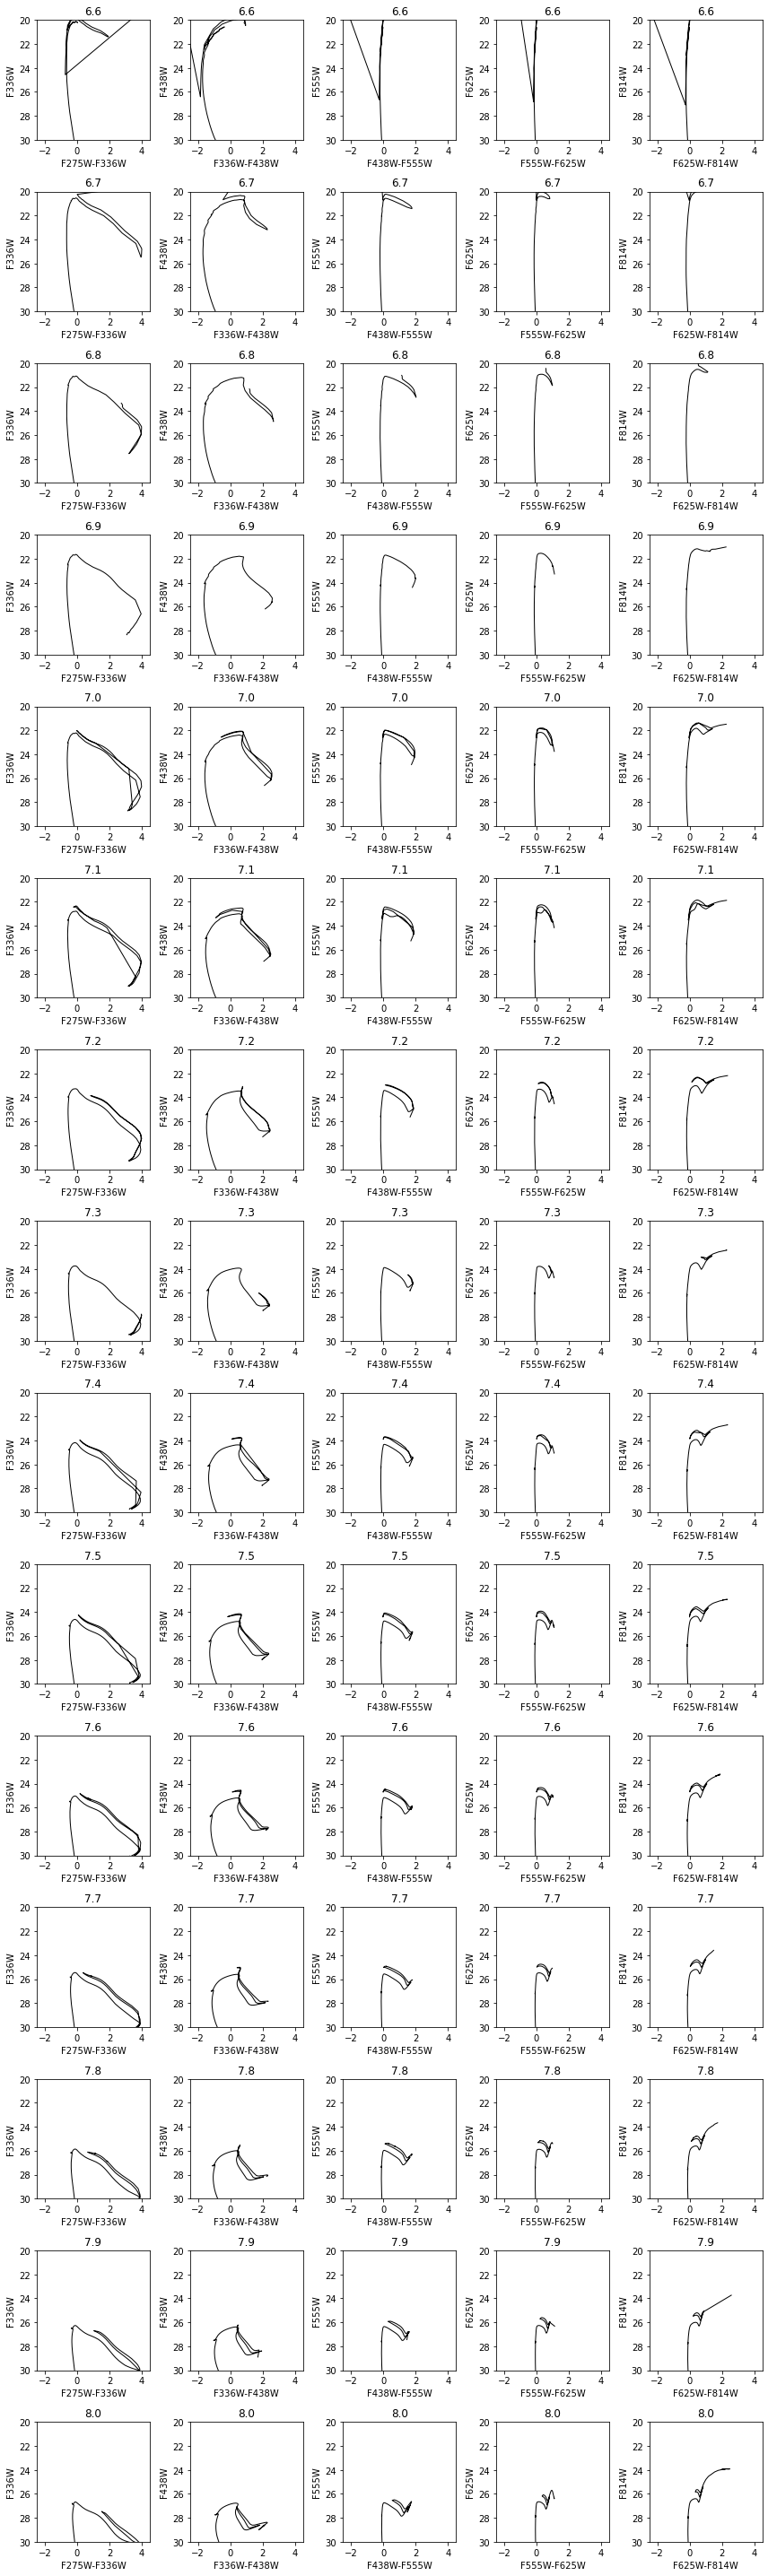

In [6]:
plt.close('all')
fig=plt.figure(figsize=[12, 40])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)-1):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands)-1, num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel(bands[ibd]+'-'+bands[ibd+1])
        ax.set_ylabel(bands[ibd+1])
        ax.set_xlim(-2.5, 4.5)
        ax.set_ylim(30, 20)
        
        # single-star isochrones
        mag1=pts_sin[iLA][bands[ibd]+'mag']+DM
        mag2=pts_sin[iLA][bands[ibd+1]+'mag']+DM
        ax.plot(mag1-mag2, mag2, linewidth=1, color='k')

fig.tight_layout()

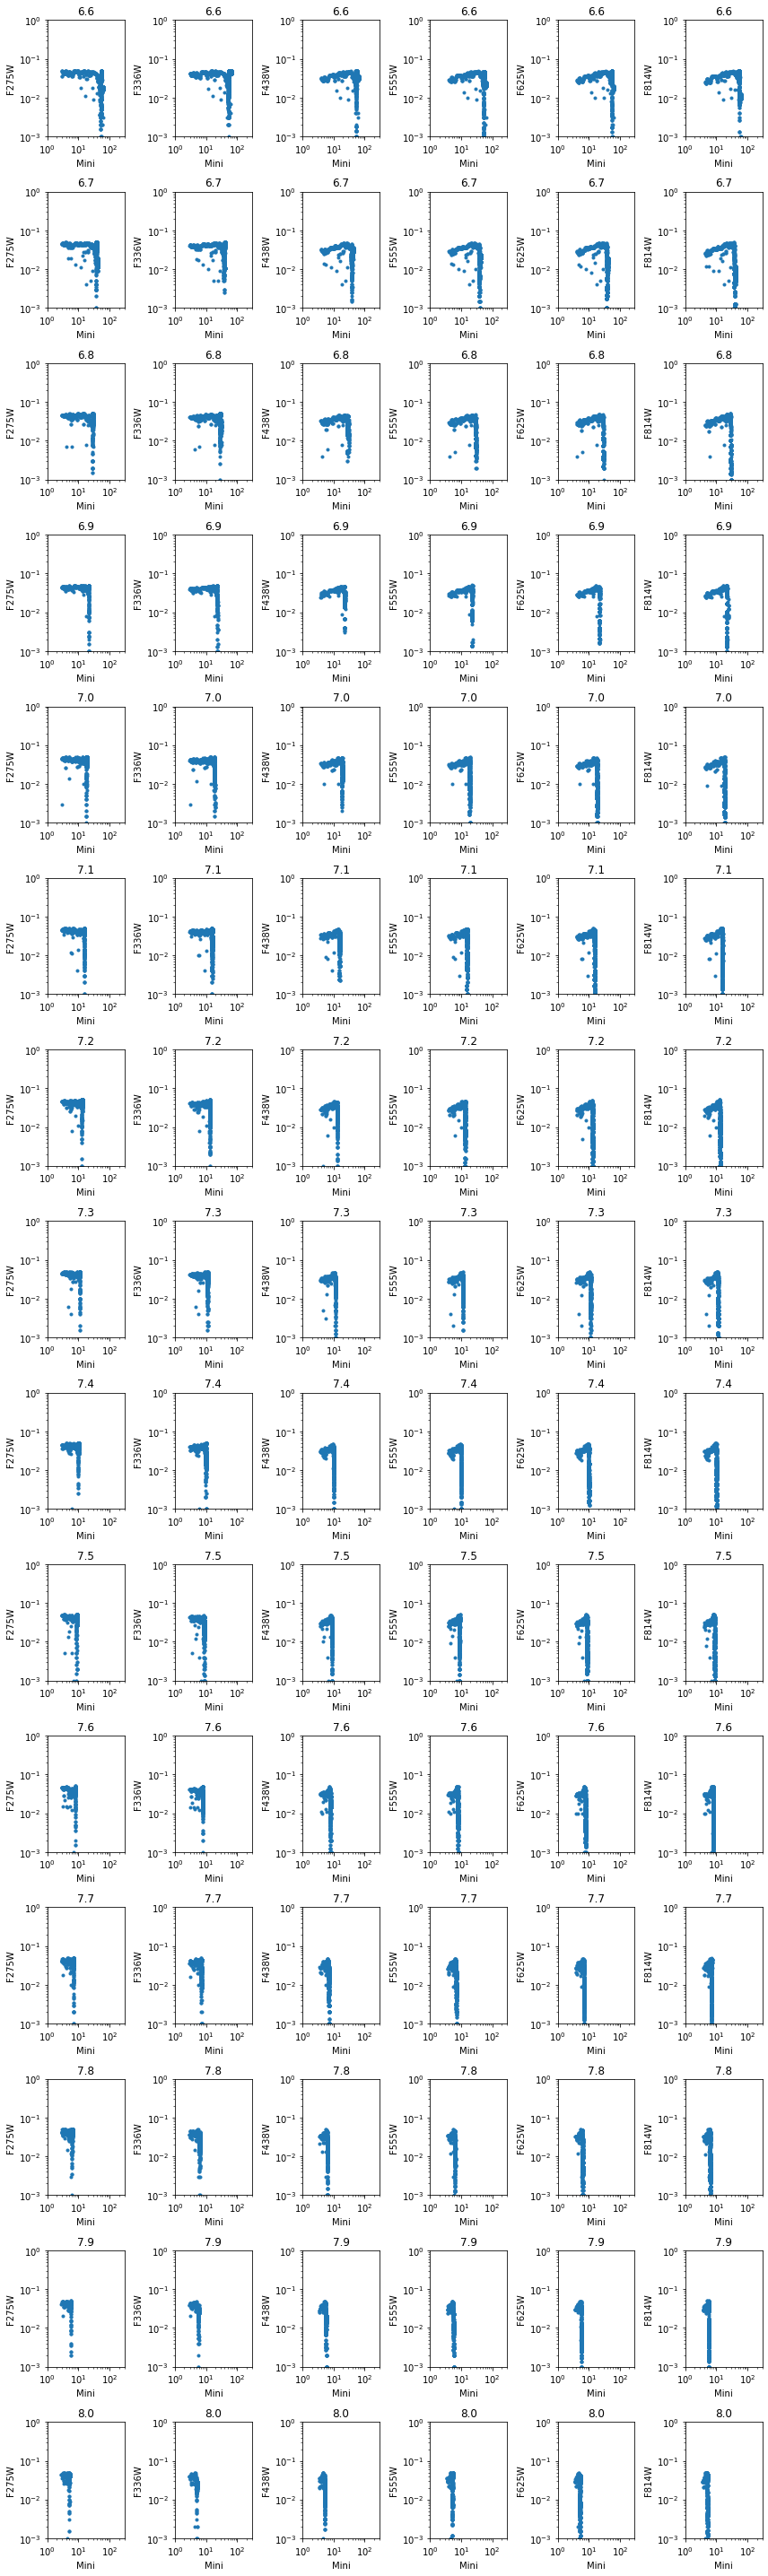

In [7]:
# magnitude spacing for single-stellar isochrones
plt.close('all')
fig=plt.figure(figsize=[12, 40])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands), num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel('Mini')
        ax.set_ylabel(bands[ibd])
        ax.set_xlim(1, 300)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1)
        ax.set_yscale('log')

        Ms=pts_sin[iLA]['Mini']
        aMs=(Ms[1:]+Ms[:-1])/2
        mags=pts_sin[iLA][bands[ibd]+'mag']
        dmags=np.abs(mags[1:]-mags[:-1])
        amags=(mags[1:]+mags[:-1])/2
        idx=(amags+DM<30)
        ax.plot(aMs[idx], dmags[idx], '.')

fig.tight_layout()

**Binary-stellar isochrones**

In [63]:
(qqs,
 pts_bin
)= pypopfit.get_lobin_isochrones(pts_sin,
                                 interps_sin,
                                 bands,
                                 massRatio_min=0.00,
                                 massRatio_max=1.001,
                                 massRatio_bin=0.005)

binary-star isochrones : q = M2/M1 = 0.0 0.005 0.01 0.015 0.02 0.025 0.03 0.035 0.04 0.045 0.05 0.055 0.06 0.065 0.07 0.075 0.08 0.085 0.09 0.095 0.1 0.105 0.11 0.115 0.12 0.125 0.13 0.135 0.14 0.145 0.15 0.155 0.16 0.165 0.17 0.175 0.18 0.185 0.19 0.195 0.2 0.205 0.21 0.215 0.22 0.225 0.23 0.235 0.24 0.245 0.25 0.255 0.26 0.265 0.27 0.275 0.28 0.285 0.29 0.295 0.3 0.305 0.31 0.315 0.32 0.325 0.33 0.335 0.34 0.345 0.35 0.355 0.36 0.365 0.37 0.375 0.38 0.385 0.39 0.395 0.4 0.405 0.41 0.415 0.42 0.425 0.43 0.435 0.44 0.445 0.45 0.455 0.46 0.465 0.47 0.475 0.48 0.485 0.49 0.495 0.5 0.505 0.51 0.515 0.52 0.525 0.53 0.535 0.54 0.545 0.55 0.555 0.56 0.565 0.57 0.575 0.58 0.585 0.59 0.595 0.6 0.605 0.61 0.615 0.62 0.625 0.63 0.635 0.64 0.645 0.65 0.655 0.66 0.665 0.67 0.675 0.68 0.685 0.69 0.695 0.7 0.705 0.71 0.715 0.72 0.725 0.73 0.735 0.74 0.745 0.75 0.755 0.76 0.765 0.77 0.775 0.78 0.785 0.79 0.795 0.8 0.805 0.81 0.815 0.82 0.825 0.83 0.835 0.84 0.845 0.85 0.855 0.86 0.865 0.87 0.875 0.88

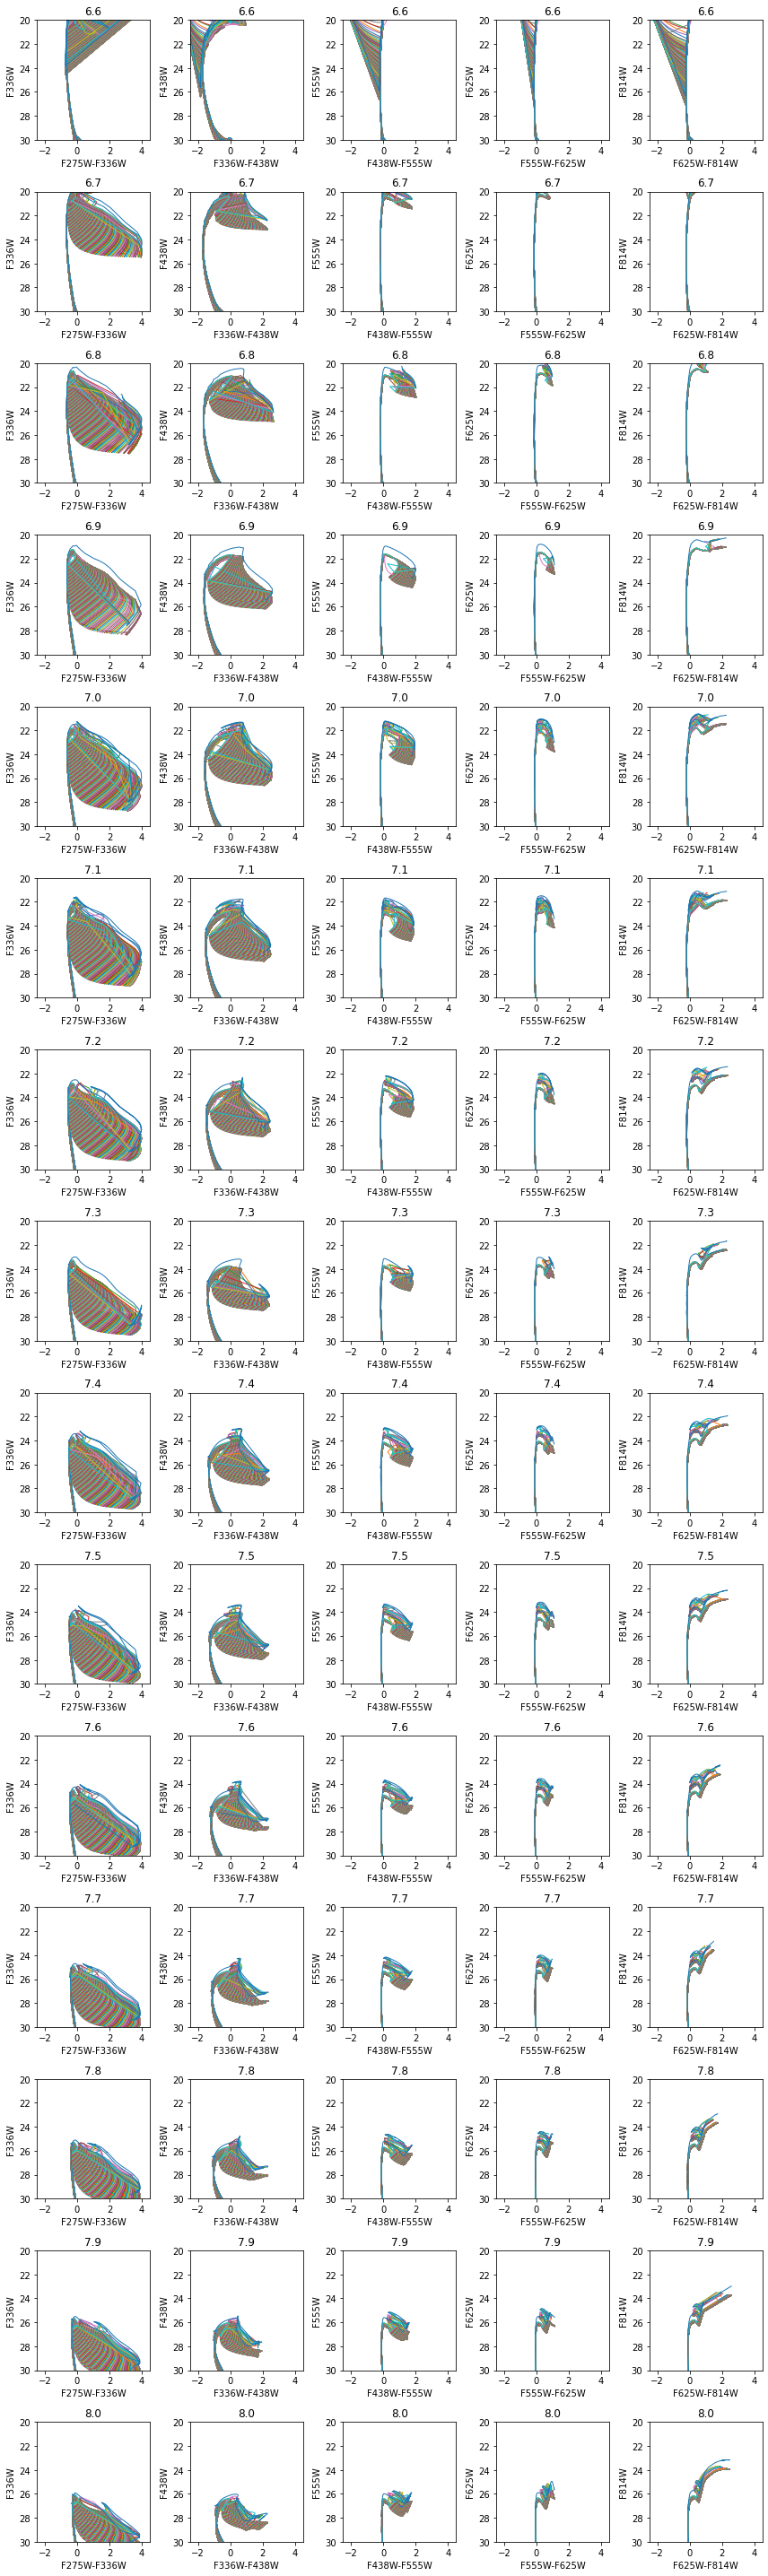

In [64]:
plt.close('all')
fig=plt.figure(figsize=[12, 40])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)-1):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands)-1, num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel(bands[ibd]+'-'+bands[ibd+1])
        ax.set_ylabel(bands[ibd+1])
        ax.set_xlim(-2.5, 4.5)
        ax.set_ylim(30, 20)
        
        # single-star isochrones
        mag1=pts_sin[iLA][bands[ibd]+'mag']+DM
        mag2=pts_sin[iLA][bands[ibd+1]+'mag']+DM
        ax.plot(mag1-mag2, mag2, linewidth=1, color='k')
        
        # binary-star isochrones
        for iqq in range(len(qqs)):
            mag1=pts_bin[iLA][iqq][bands[ibd]+'mag']+DM
            mag2=pts_bin[iLA][iqq][bands[ibd+1]+'mag']+DM
            ax.plot(mag1-mag2, mag2, linewidth=1)

fig.tight_layout()

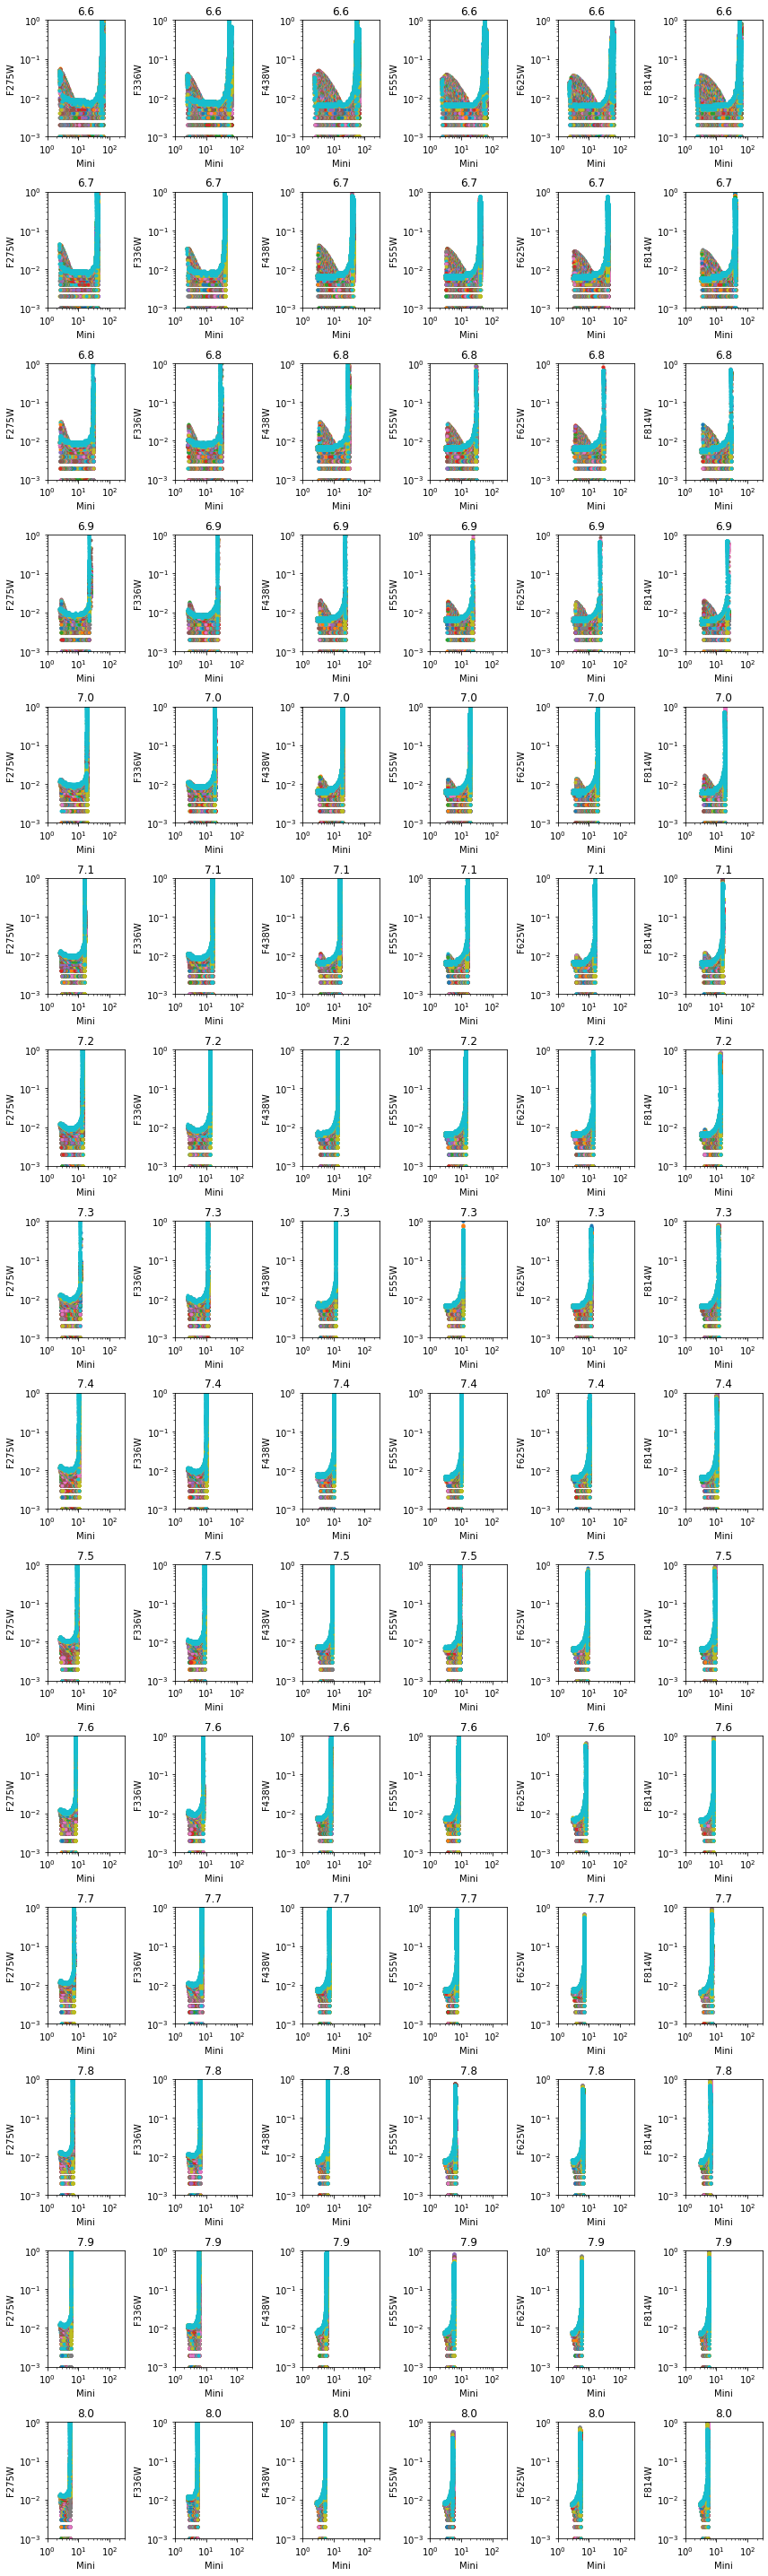

In [65]:
# magnitude spacing for binary-stellar isochrones
plt.close('all')
fig=plt.figure(figsize=[12, 40])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands), num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel('Mini')
        ax.set_ylabel(bands[ibd])
        ax.set_xlim(1, 300)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1)
        ax.set_yscale('log')
        
        Ms=pts_sin[iLA]['Mini']
        for iqq in range(len(qqs)-1):
            # if iqq!=8: continue
            mag1=pts_bin[iLA][iqq][bands[ibd]+'mag']
            mag2=pts_bin[iLA][iqq+1][bands[ibd]+'mag']
            dmags=np.abs(mag1-mag2)
            idx=(mag1+DM<30)
            ax.plot(Ms[idx], dmags[idx], '.')

fig.tight_layout()

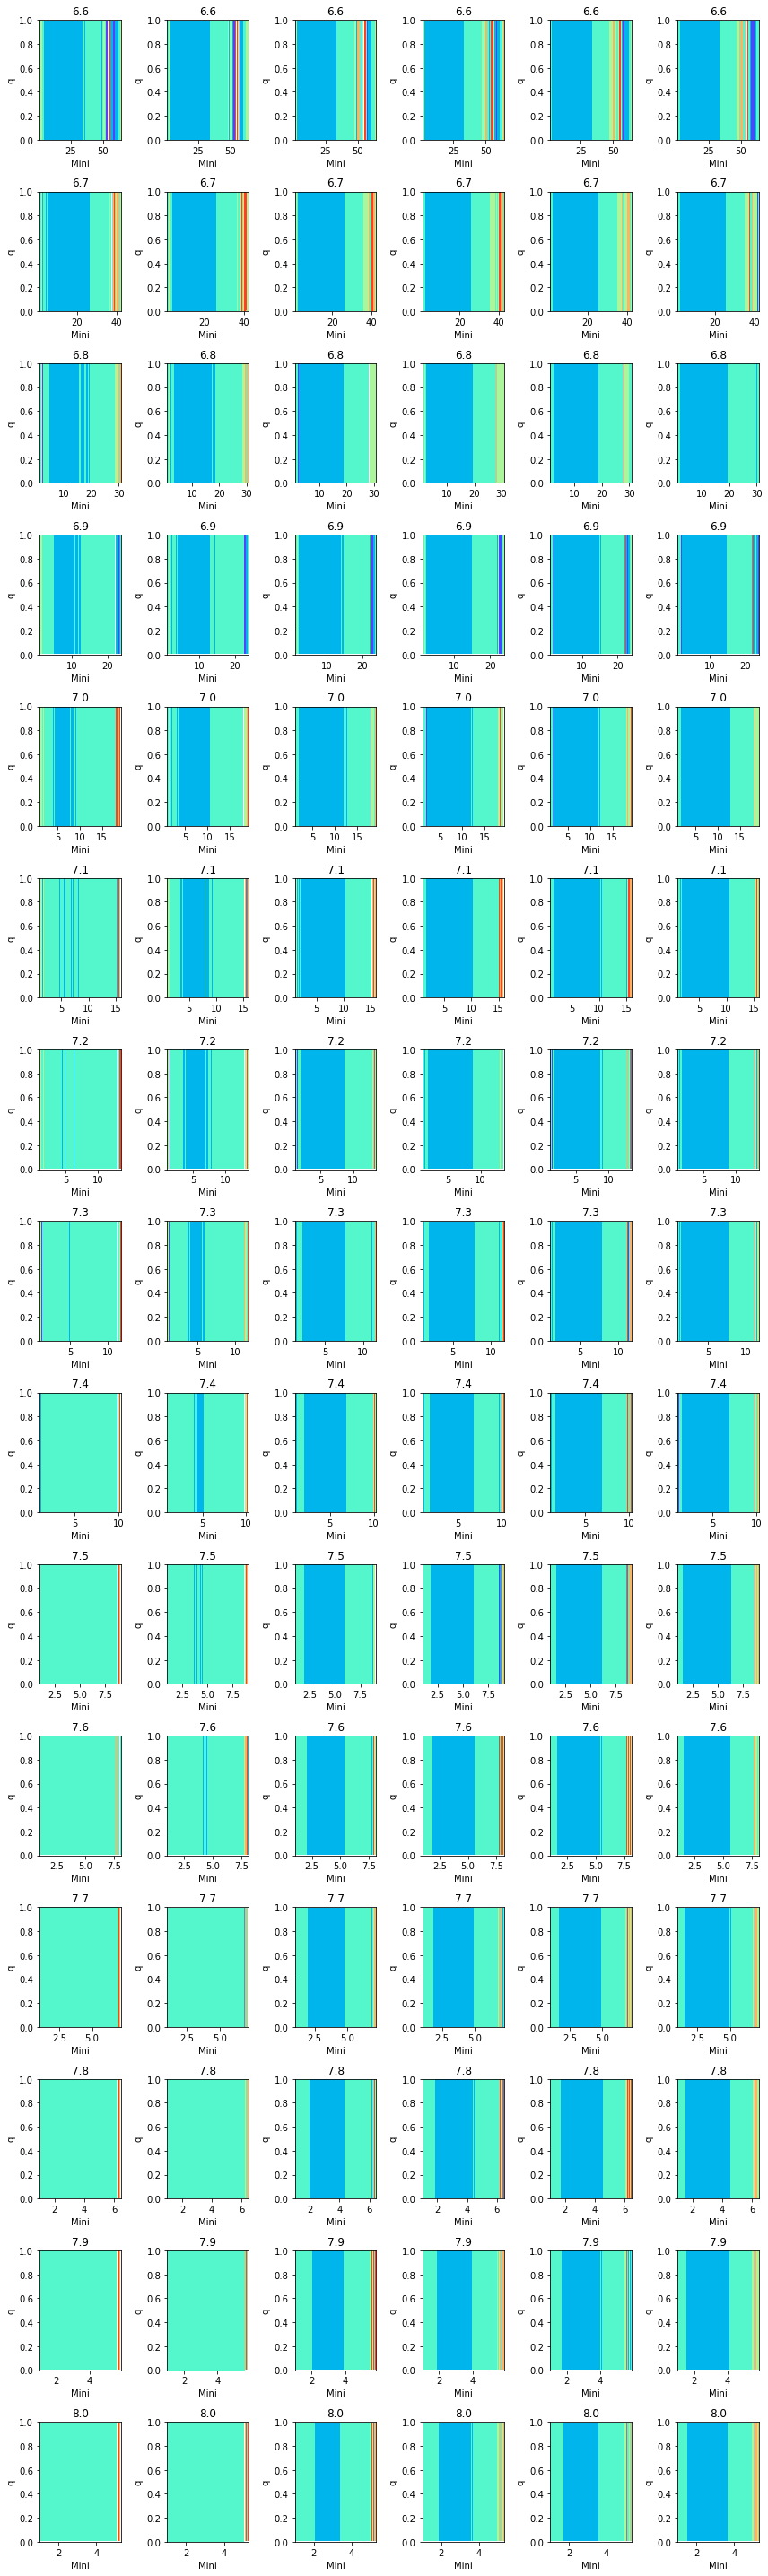

In [66]:
# magnitude spacing for binary-stellar isochrones
plt.close('all')
fig=plt.figure(figsize=[12, 40])
num=0
aqqs=(qqs[1:]+qqs[:-1])/2
for iLA in range(len(LAs)):
    Ms=pts_sin[iLA]['Mini']
    for ibd in range(len(bands)):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands), num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel('Mini')
        ax.set_ylabel('q')
        # ax.set_xlim(1, 300)
        ax.set_xlim(1, np.amax(Ms))
        # ax.set_xscale('log')
        ax.set_ylim(0, 1)
        # ax.set_yscale('log')

        dmags=np.zeros((len(qqs)-1, len(Ms)), dtype=np.float32)
        for iq in range(len(qqs)-1):
            mag1=pts_bin[iLA][iqq][bands[ibd]+'mag']
            mag2=pts_bin[iLA][iqq+1][bands[ibd]+'mag']
            dmags[iq, :]=np.abs(mag1-mag2)
        dmags=np.log10(dmags+1e-3)
        
        ax.contourf(Ms, aqqs, dmags, cmap='rainbow',
                    vmin=-3, vmax=0, levels=[-3, -2.5, -2, -1.5, -1, -0.5, 0])

fig.tight_layout()

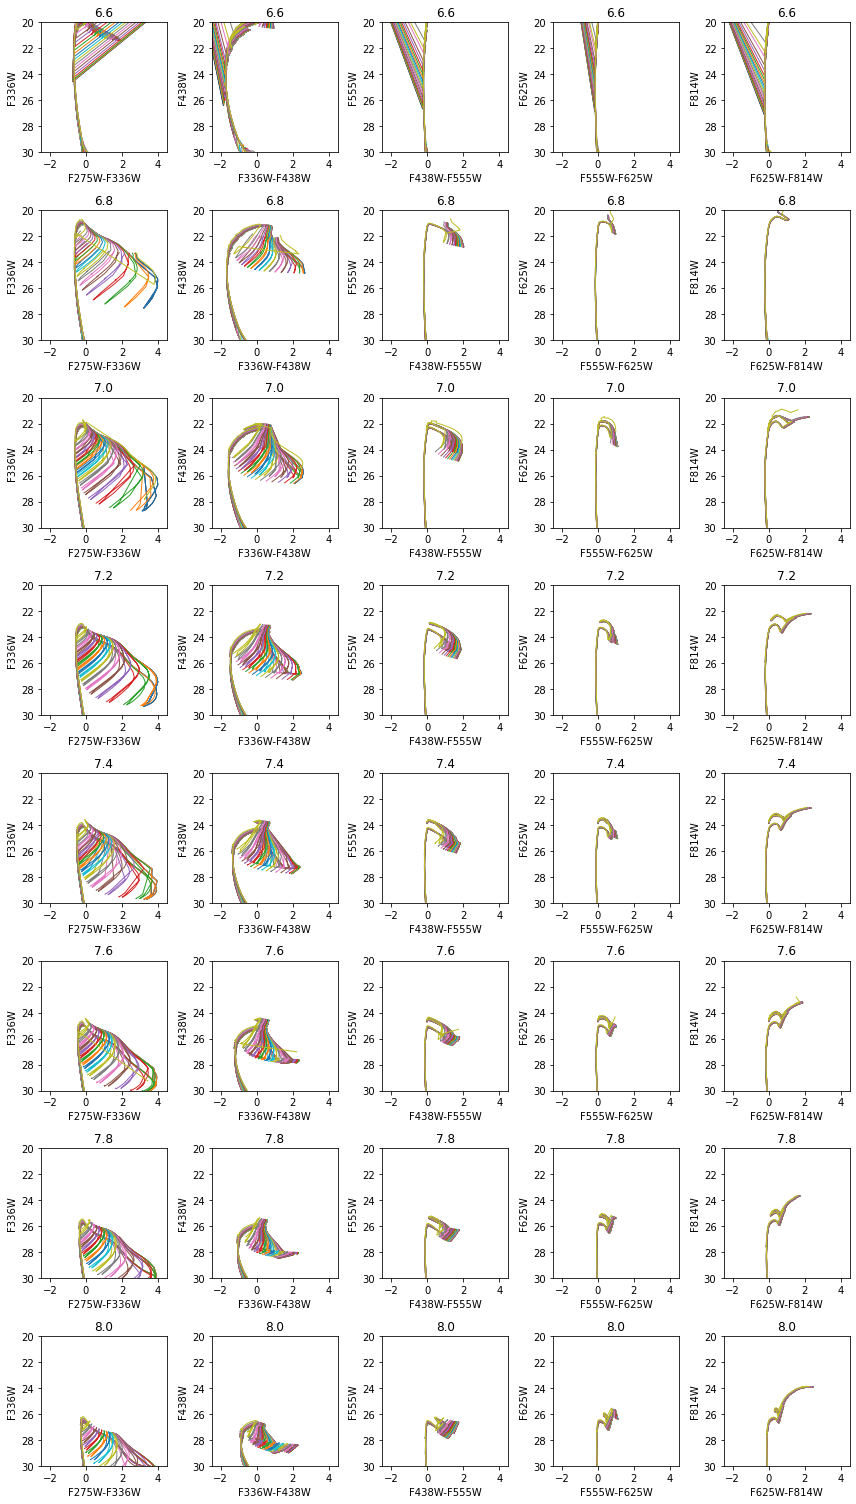

In [6]:
plt.close('all')
fig=plt.figure(figsize=[12, 21])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)-1):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands)-1, num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel(bands[ibd]+'-'+bands[ibd+1])
        ax.set_ylabel(bands[ibd+1])
        ax.set_xlim(-2.5, 4.5)
        ax.set_ylim(30, 20)
        
        # single-star isochrones
        mag1=pts_sin[iLA][bands[ibd]+'mag']+DM
        mag2=pts_sin[iLA][bands[ibd+1]+'mag']+DM
        ax.plot(mag1-mag2, mag2, linewidth=1, color='k')
        
        # binary-star isochrones
        for iqq in range(len(qqs)):
            
            mag1=pts_bin_lower[iqq][iLA][bands[ibd]+'mag']+DM
            mag2=pts_bin_lower[iqq][iLA][bands[ibd+1]+'mag']+DM
            ax.plot(mag1-mag2, mag2, linewidth=1)
            
            mag1=pts_bin_upper[iqq][iLA][bands[ibd]+'mag']+DM
            mag2=pts_bin_upper[iqq][iLA][bands[ibd+1]+'mag']+DM
            # ax.plot(mag1-mag2, mag2, linewidth=1)
            
            mag1=pts_bin[iqq][iLA][bands[ibd]+'mag']+DM
            mag2=pts_bin[iqq][iLA][bands[ibd+1]+'mag']+DM
            # ax.plot(mag1-mag2, mag2, linewidth=1)

fig.tight_layout()

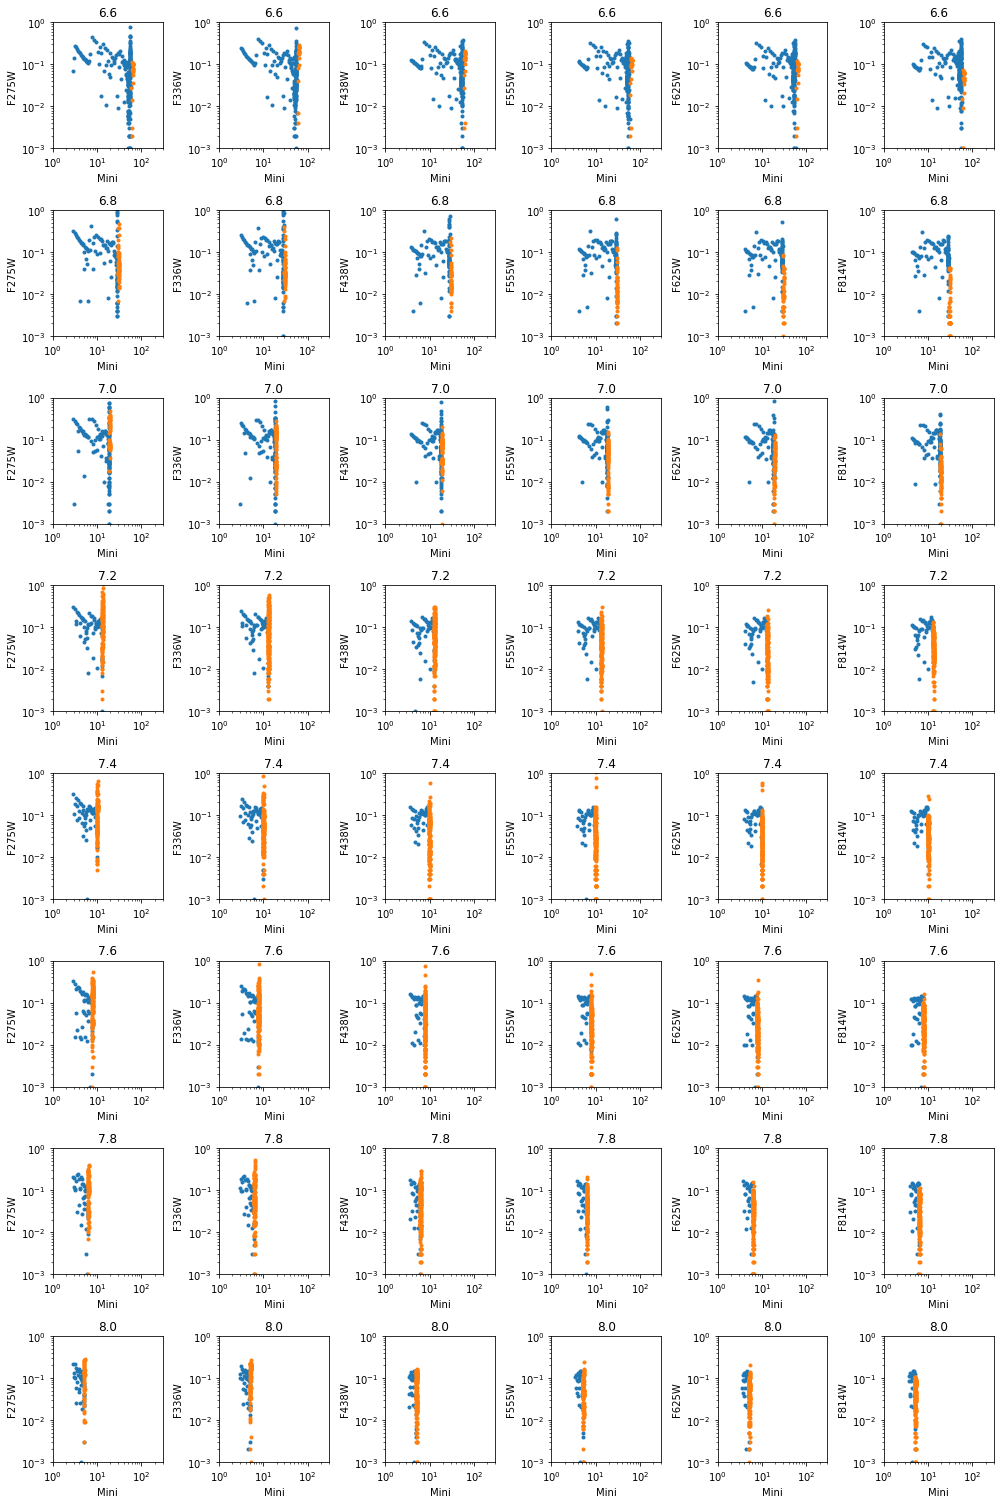

In [9]:
# magnitude spacing for single-stellar isochrones (~0.1 dex level)
plt.close('all')
fig=plt.figure(figsize=[14, 21])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands), num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel('Mini')
        ax.set_ylabel(bands[ibd])
        ax.set_xlim(1, 300)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1)
        ax.set_yscale('log')
        
        label=pts_sin[iLA]['label']
        label=label[1:]
        Ms=pts_sin[iLA]['Mini']
        dMs=np.abs(Ms[1:]-Ms[:-1])
        aMs=(Ms[1:]+Ms[:-1])/2
        mags=pts_sin[iLA][bands[ibd]+'mag']
        dmags=np.abs(mags[1:]-mags[:-1])
        amags=(mags[1:]+mags[:-1])/2
        idx=(amags+DM<30) & (label<2)
        ax.plot(aMs[idx], dmags[idx], '.')
        idx=(amags+DM<30) & (label>=2)
        ax.plot(aMs[idx], dmags[idx], '.')

fig.tight_layout()

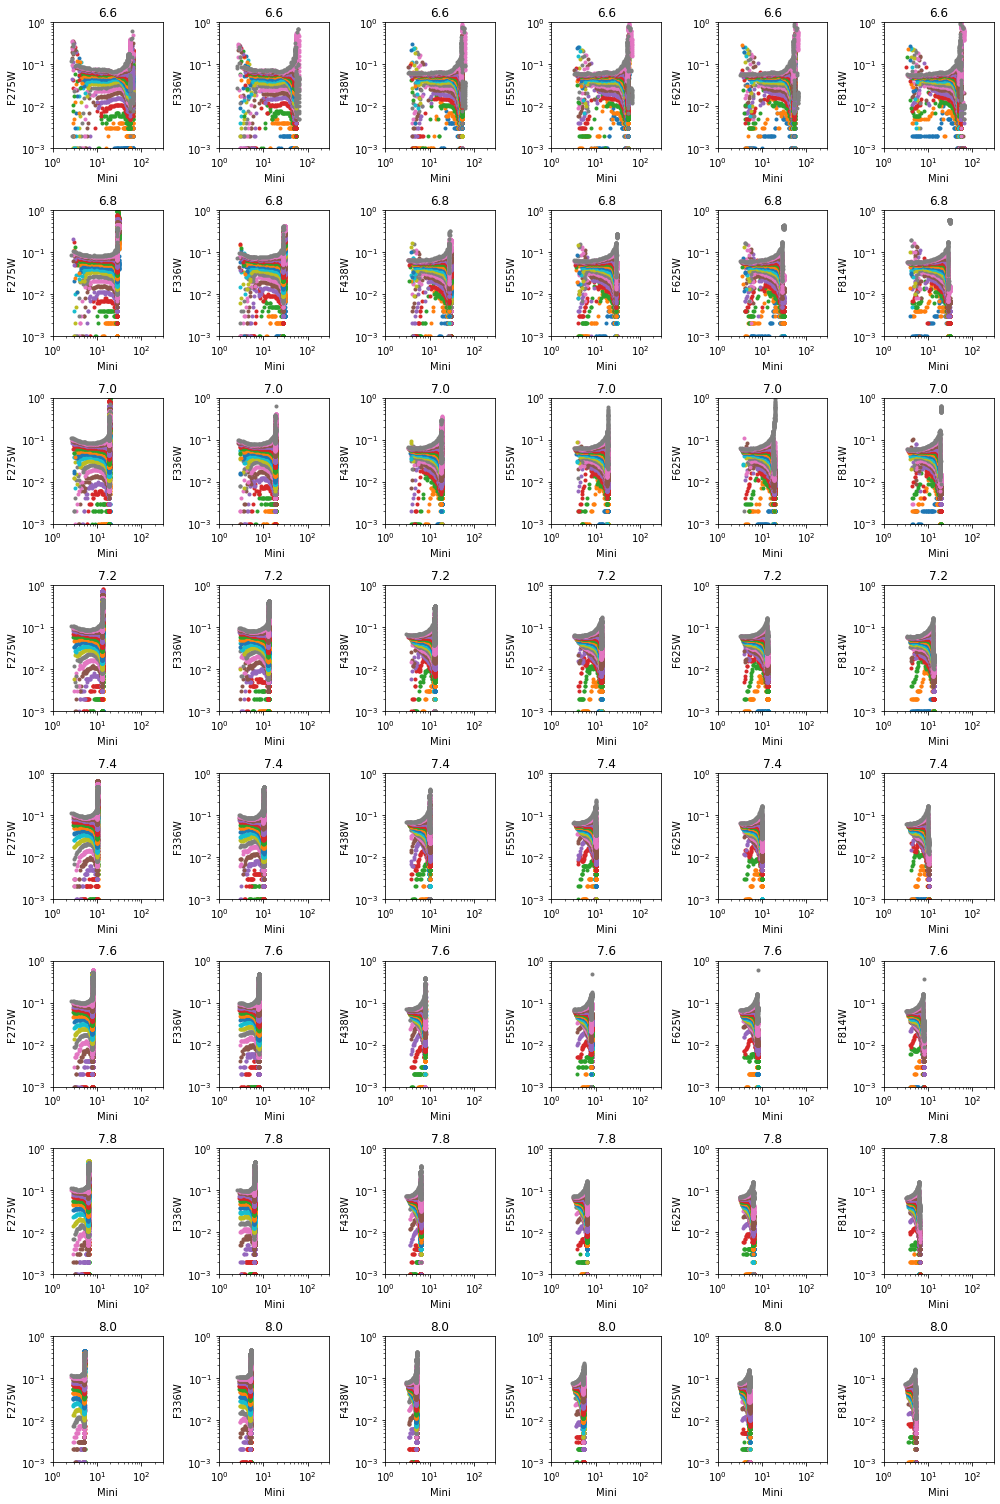

In [35]:
# magnitude spacing for binary-stellar isochrones (~0.1 dex level for dq=0.1)
plt.close('all')
fig=plt.figure(figsize=[14, 21])
num=0
for iLA in range(len(LAs)):
    for ibd in range(len(bands)):
        num=num+1
        ax=fig.add_subplot(len(LAs), len(bands), num)
        ax.set_title(str(LAs[iLA]))
        ax.set_xlabel('Mini')
        ax.set_ylabel(bands[ibd])
        ax.set_xlim(1, 300)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1)
        ax.set_yscale('log')
        
        Ms=pts_sin[iLA]['Mini']
        for iqq in range(len(qqs)-1):
            mag1=pts_bin_lower[iqq][iLA][bands[ibd]+'mag']
            mag2=pts_bin_lower[iqq+1][iLA][bands[ibd]+'mag']
            dmags=mag1-mag2
            idx=(mag1+DM<30)
            ax.plot(Ms[idx], dmags[idx], '.')

fig.tight_layout()

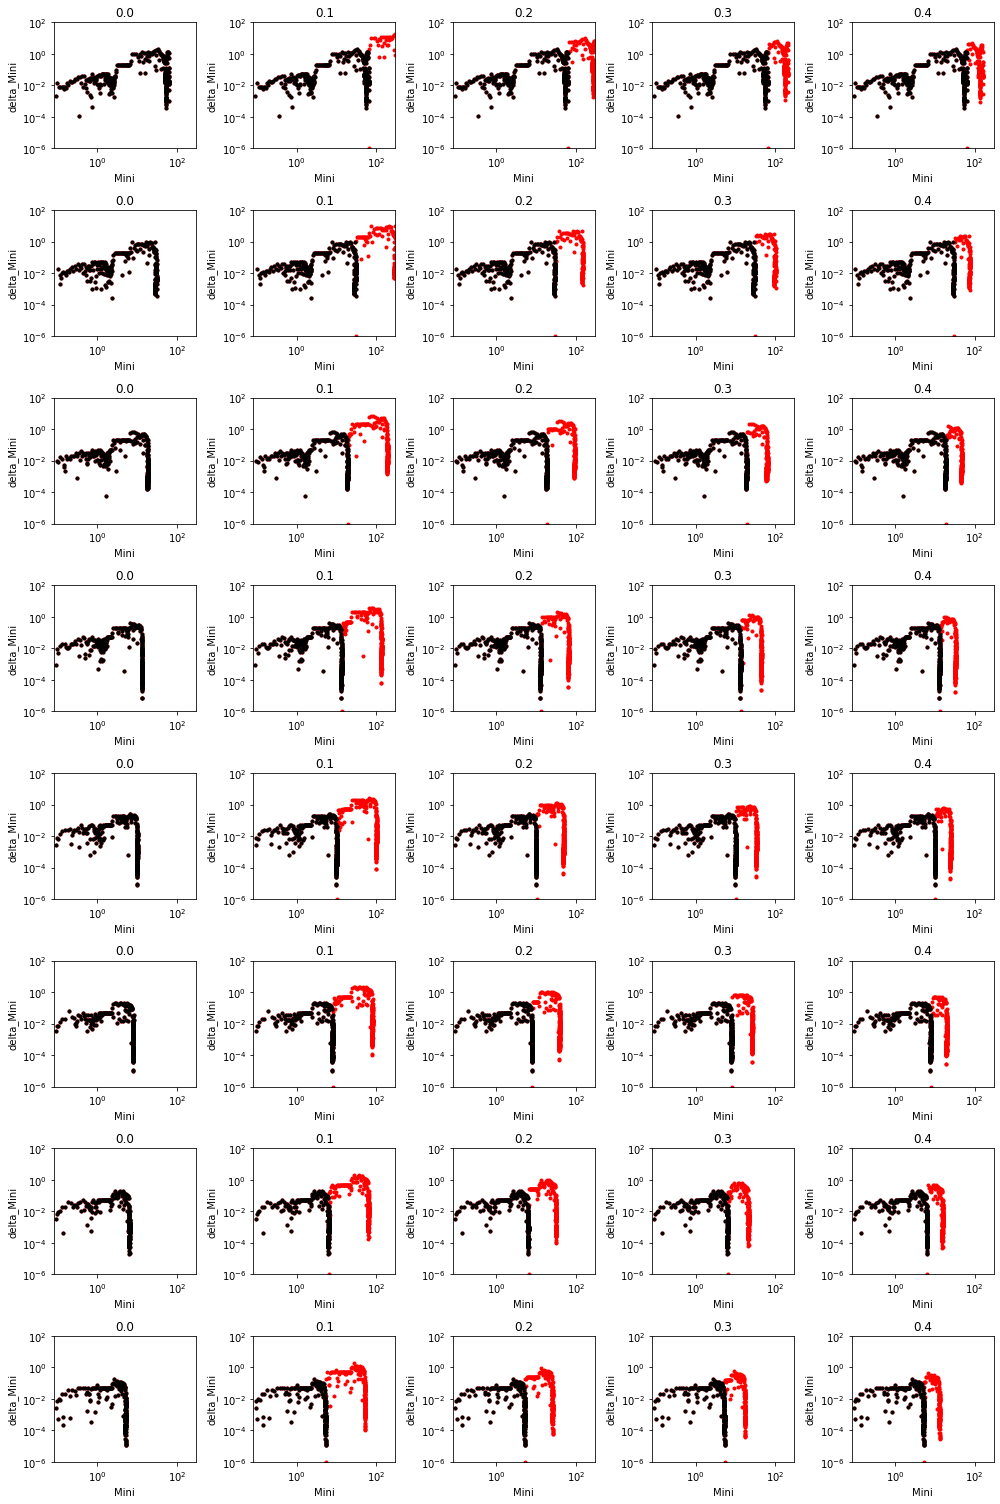

In [28]:
plt.close('all')
fig=plt.figure(figsize=[14, 21])

num=0
for iLA in range(len(LAs)):
    for iqq in range(0, 5):
        num=num+1

        ax=fig.add_subplot(len(LAs), 5, num)
        ax.set_xlabel('Mini')
        ax.set_ylabel('delta_Mini')
        ax.set_xlim(0.08, 300)
        ax.set_xscale('log')
        ax.set_ylim(1e-6, 100)
        ax.set_yscale('log')
        ax.set_title(str(qqs[iqq]))
        
        Ms=pts_bin[iqq][iLA]['Mini']
        ax.plot((Ms[1:]+Ms[:-1])/2, Ms[1:]-Ms[:-1], 'r.')
        
        Ms=pts_sin[iLA]['Mini']
        ax.plot((Ms[1:]+Ms[:-1])/2, Ms[1:]-Ms[:-1], 'k.')
                
fig.tight_layout()